# Sentiment Analysis with Hugging Face

Hugging Face is an open-source and platform provider of machine learning technologies.

In this project, we will fine-tune pre-trained Deep Learning models from HuggingFace on a new dataset to adapt the models to the task that we want to solve, i.e the prediction of the sentiment expressed in a Tweet (e.g: neutral, positive, negative), then create an app to use the models and deploy the app on the HuggingFace platform.

## Application of Hugging Face Text classification model Fune-tuning

Find below a simple example, with just `3 epochs of fine-tuning`.

Read more about the fine-tuning concept : [here](https://deeplizard.com/learn/video/5T-iXNNiwIs#:~:text=Fine%2Dtuning%20is%20a%20way,perform%20a%20second%20similar%20task.)

In [2]:
!pip install datasets

In [3]:
!pip install transformers

In [4]:
# install datasets so as to load data
!pip install datasets

In [5]:
from transformers import TrainingArguments
!pip install transformers[torch]
!pip install accelerate -U
!pip install -qU transformers datasets accelerate


In [6]:
import os   # provides a way to interact with the operating system, accessing files and directories
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datasets import load_dataset  # this function is used to load a dataset for further processing and analysis
from sklearn.model_selection import train_test_split #

In [7]:
from transformers import pipeline
!pip install transformers

In [8]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

#This code will stop any subsequent code that relies on W&B will not use Weights & Biases

In [9]:
from sklearn.model_selection import train_test_split


In [12]:
!pip install nltk
import nltk


In [13]:
nltk.download('punkt')

from nltk import download
# NLTK - Natural Language Toolkit Library



# Download stopwords - Stopwords are commonly used words "a", "the" , "an", "is", "are".
# Are removed since they dont carry significant meaning to the words
download('stopwords')


# import specific functions and classes from NLTK (Natural Language Toolkit library)

from nltk.tokenize import word_tokenize  # used for tokenizing text into individual words
from nltk.corpus import stopwords # provides a list of common words that are often removed from text
from nltk.stem import PorterStemmer # is a stemming algorithm that reduces words to their base or root form

# Initializes stop variable, assigns it the list of English stopwords from the NLTK corpus.
stop = stopwords.words('english')

# creates an instance of the PorterStemmer class, assigns it to the variable stemmer.
# The stemmer will be used later to perform word stemming, which reduces words to their base or root
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# BASIC EDA

**1.0 Reading into our dataset**

In [16]:
# Load the dataset and display some values
df = pd.read_csv('/content/drive/MyDrive/data/Train.csv')

**1.1 Look into our df**

In [17]:
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


**1.2 Check and sort for missing values**

In [18]:
df.isna().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

In [19]:
# Sort for missing values
df = df[~df.isna().any(axis=1)]

In [20]:
# Check if changes have taken effect
df.isna().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

# 2.0 EDA ANALYSIS

In [21]:
df.head(3)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0


**2.1 Check distribution of the labels**

In [22]:
df2 = df.copy()

df['label'].value_counts()

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

In [23]:

def map_label_to_label_name(label):
    if label == 0:
        return 'neutral'
    elif label == 1:
        return 'positive'
    elif label == -1:
        return 'negative'
    else:
        return 'unknown'  # You can handle other cases as needed

# Apply the function to create the new column 'label_name'
df2['label_name'] = df2['label'].apply(map_label_to_label_name)

df2.head()

,tweet_id,safe_text,label,agreement,label_name
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,neutral
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,positive
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,negative
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,negative
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,neutral


In [24]:
df2['label_name'].value_counts()

neutral     4908
positive    4053
negative    1038
Name: label_name, dtype: int64

In [25]:
# Calculate the value counts and sort by index
label_counts = df2['label_name'].value_counts().sort_index()

# Create the bar chart using Plotly Express
fig = px.bar(
    x=label_counts.index,  # X-axis: sentiment labels
    y=label_counts.values,  # Y-axis: count of each sentiment label
    title="DISTRIBUTION OF THE LABEL COLUMNS"
)

# Show the plot
fig.show()


**2.2 Check distribution of labels using pie chart**

In [26]:
label_counts = pd.DataFrame(df2['label_name'].value_counts().sort_index())

label_counts['percentage'] = label_counts['label_name']/9999 * 100

label_counts

,label_name,percentage
negative,1038,10.381038
neutral,4908,49.084908
positive,4053,40.534053


**3.0 Cleaning of safetext column**

In [27]:
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [28]:
df['safe_text']

0        Me &amp; The Big Homie meanboy3000 #MEANBOY #M...
1        I'm 100% thinking of devoting my career to pro...
2        #whatcausesautism VACCINES, DO NOT VACCINATE Y...
3        I mean if they immunize my kid with something ...
4        Thanks to <user> Catch me performing at La Nui...
                               ...                        
9996     Living in a time where the sperm I used to was...
9997     <user> <user>  In spite of all measles outbrea...
9998     Interesting trends in child immunization in Ok...
9999     CDC Says Measles Are At Highest Levels In Deca...
10000    Pneumonia vaccine: for women w risk of pulmona...
Name: safe_text, Length: 9999, dtype: object

**3.1 Display the safe_text column as a bid giant sentence to see observable patterns , trends etc**

In [29]:
# Display as one big sentence
giant_sentence = ' '.join(df['safe_text'].astype(str))

print(giant_sentence)


Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url> I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day #whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url> <user> a nearly 67 year old study when mental health studies and vaccines were relatively in their infancies that has been refuted? Study of more than 95,000 kids finds no link between MMR vaccine and autism <url> psa: VACCINATE YOUR FUCKING KIDS Coughing extra on the shuttle and everyone thinks I have the measles. 😂 #VaccinateYourKids AIDS vaccine created at Oregon Health &amp; Science University may clear virus from body - <url> <url> <user> @ this point I hav

**3.2 Observations**

1.   There are emojis within the text, These emojis tell about the general mood
     of the text.
2.   Since we are seeking to understand whether the user sentiment on covid
     vaccine is +ve , neutral or -ve. We have found out that within the texts there are texts on **other vaccines and immunizations of different illnesses**

3.  There are characters and punctuation marks not relevant to our     analysis       eg dots , These ones we shall remove

4. Within still in our safe_text column , we are having dats and time e.g Jan
   12-14, 5-8pm .
   Depending on their importance we will decide whether to keep or remove these for analysis
5. We are having characters enclosed in this < >,
   Most of which are <user>, <url> , <links>.

   Since they do not carry alot of heavy meaning to our sentence we shall remove them in our analysis
6. There are words beginning with # Which describe a topic or a general feeling
   or even  a mood of a statement.

  Although these statements not always describe the mood of a statement we will not remove them
7. Keep all the numerical characters that end with %, Since they are found to
   be engaing in a vaccine, immunization , disease related to our interested topic.  

8. There are words within our statement e.g FUCKING !, IDIOTS ! That generally
   describe a negative attitude towards our statemnt, **BUT** is a positive sentiment to the Covid Vaccine conversation.


**3.3 Look for observing most frequent words**

**Use Word Cloud to see most appearing texts in the safe_text column**

**IN THE WHOLE SAFE TEXT COLUMN**

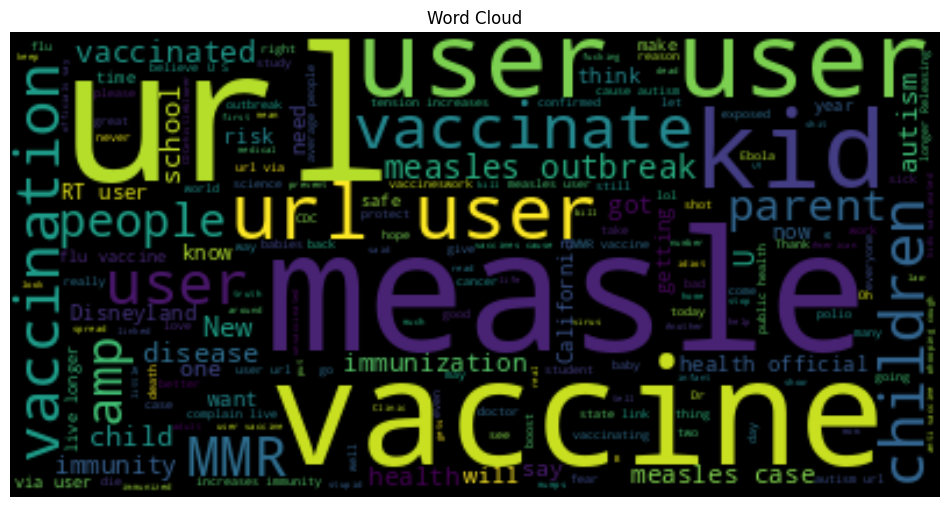

In [30]:
from wordcloud import WordCloud

# Create a WordCloud from the text data
wordcloud = WordCloud().generate(giant_sentence)

# Visualize the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

**3.3 Get top 20 words from the word cloud, from the whole safe text column**

In [31]:
# Get the word frequency dictionary from the WordCloud
word_frequency = wordcloud.words_

# Sort the word frequency dictionary by descending order of frequency
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda item: item[1], reverse=True))

# Get the top 20 words
top_30 = list(sorted_word_frequency)[:30]

pd.DataFrame(top_30)

,0
0,url
1,measle
2,vaccine
3,user user
4,kid
5,url user
6,vaccinate
7,user
8,vaccination
9,children


**Observations of most occuring words**

**NB**

Since our safe_text column had already been tagged as either positive , negative and neutral. We want to use the word cloud on separate columns to see which words are classified as already classified

**3.4 Create separete df's with the separate feelings**

**Then Visualize most common words**

In [32]:
df2.head(2)

,tweet_id,safe_text,label,agreement,label_name
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,neutral
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,positive


In [33]:
neutral = df[df['label']==0.0]
positive = df[df['label']==1.0]
negatiev = df[df['label']==-1.0]

In [34]:
# negative

**3.5 Negative labels - Most occuring analysis**

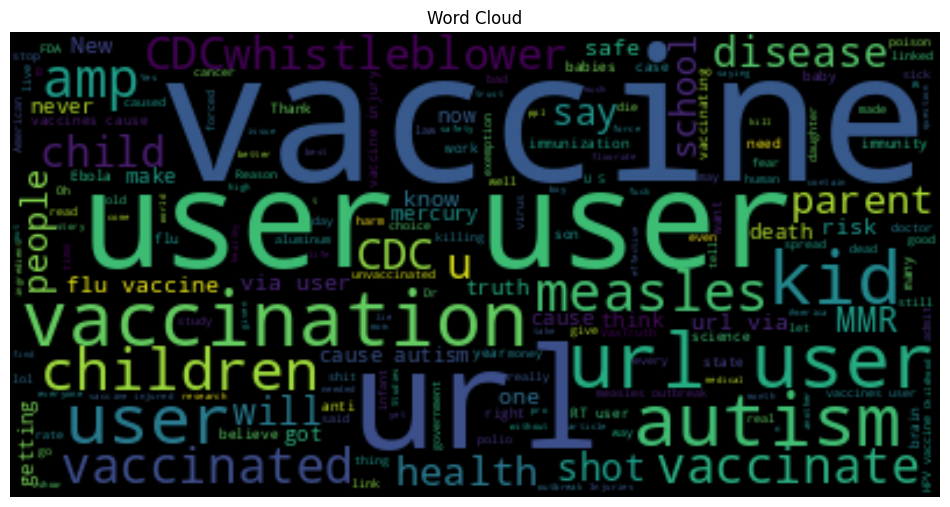

In [35]:
neg_sentence = ' '.join(negatiev['safe_text'].astype(str))

wordcloud = WordCloud().generate(neg_sentence)

# Visualize the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [36]:
# Get the word frequency dictionary from the WordCloud
word_frequency = wordcloud.words_

# Sort the word frequency dictionary by descending order of frequency
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda item: item[1], reverse=True))

# Get the top 20 words
top_30 = list(sorted_word_frequency)[:30]

neg = pd.DataFrame(top_30)

In [37]:
import nltk

In [38]:
word_frequency = nltk.FreqDist(neutral['safe_text'].str.split().sum())
neg_words = word_frequency.most_common(10)

neg_words = pd.DataFrame(neg_words)

neg_words

,0,1
0,<url>,2482
1,<user>,2098
2,the,1624
3,to,1433
4,measles,1214
5,in,1008
6,of,1005
7,a,918
8,and,877
9,I,758


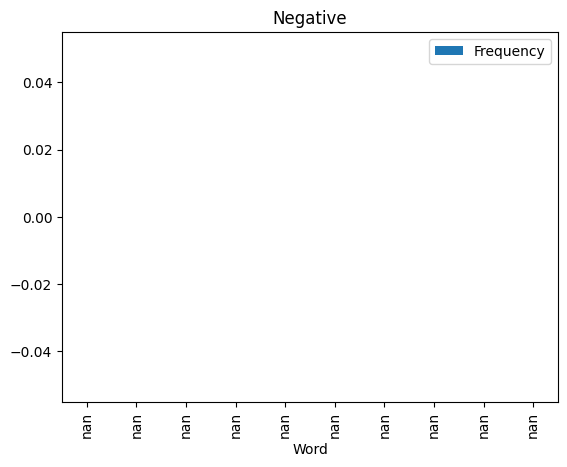

In [40]:
word_df = pd.DataFrame(neg_words, columns=['Word', 'Frequency'])
word_df.plot(x='Word', y='Frequency', kind='bar')
plt.title("Negative")
plt.show()

**3.6 Positive labels - Most Occuring**

In [41]:
# positive

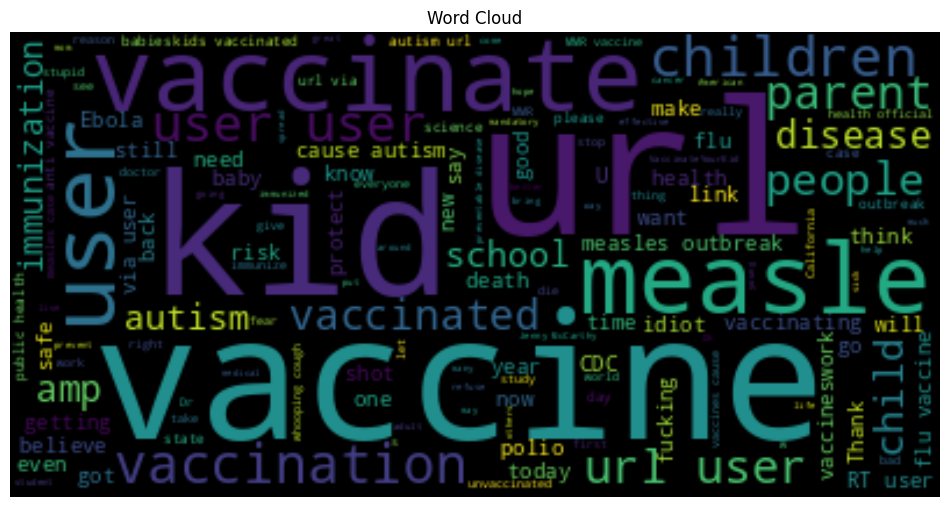

In [42]:
pos_sentence = ' '.join(positive['safe_text'].astype(str))

wordcloud = WordCloud().generate(pos_sentence)

# Visualize the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [43]:
word_frequency = nltk.FreqDist(positive['safe_text'].str.split().sum())
positive_words = word_frequency.most_common(10)

#pd.DataFrame(positive_words)

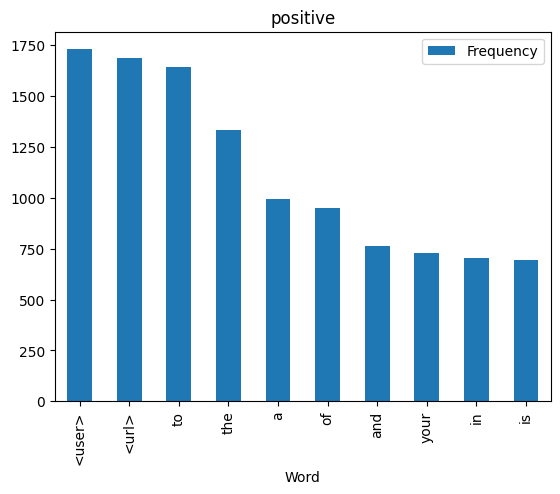

In [44]:
word_df = pd.DataFrame(positive_words, columns=['Word', 'Frequency'])
word_df.plot(x='Word', y='Frequency', kind='bar')
plt.title("positive")
plt.show()

**3.7 Neutral words most occuring**

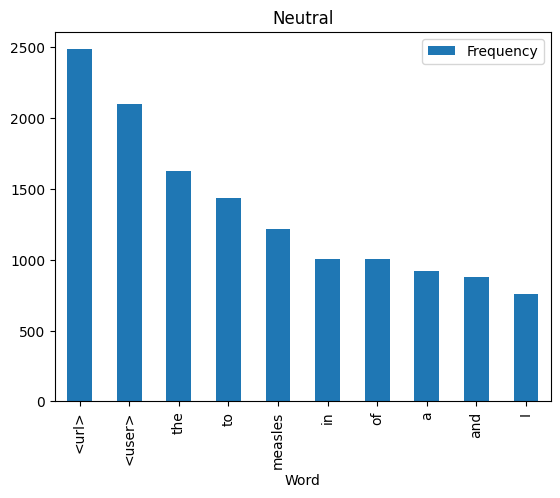

In [45]:
word_frequency = nltk.FreqDist(neutral['safe_text'].str.split().sum())
neutral_words = word_frequency.most_common(10)

#pd.DataFrame(neutral_words)

word_df = pd.DataFrame(neutral_words, columns=['Word', 'Frequency'])
word_df.plot(x='Word', y='Frequency', kind='bar')
plt.title("Neutral")
plt.show()

**3.8 Combine all the most occuring words into one df**

In [46]:
neg_words.head(2)

,0,1
0,<url>,2482
1,<user>,2098


In [47]:
positive_words = pd.DataFrame(positive_words)
positive_words.head(2)

,0,1
0,<user>,1729
1,<url>,1687


In [51]:
neutral_words = pd.DataFrame(neutral_words).head(2)

In [52]:
comb_1 = neg_words.join(positive_words, lsuffix='_caller', rsuffix='_positive_words')

In [53]:
combined = comb_1.join(neutral_words, lsuffix='_caller', rsuffix='_neutral_words')

combined.head(2)

,0_caller,1_caller,0_positive_words,1_positive_words,0,1
0,<url>,2482,<user>,1729,<url>,2482.0
1,<user>,2098,<url>,1687,<user>,2098.0


In [55]:
# Renaming top 10 columns for better understanding
col_names = {
    '0_caller':'negative__top_10',
    '1_caller':'negative_frequency',
    '0_positive_words':'positive_top_10',
    '1_positive_words':'positive_frequency',
     0  :'neutral_top_10',
     1 :'neutral_frequency'
}

combined = combined.rename(columns = col_names)

combined

,negative__top_10,negative_frequency,positive_top_10,positive_frequency,neutral_top_10,neutral_frequency
0,<url>,2482,<user>,1729,<url>,2482.0
1,<user>,2098,<url>,1687,<user>,2098.0
2,the,1624,to,1644,NaN,NaN
3,to,1433,the,1334,NaN,NaN
4,measles,1214,a,995,NaN,NaN
5,in,1008,of,948,NaN,NaN
6,of,1005,and,764,NaN,NaN
7,a,918,your,727,NaN,NaN
8,and,877,in,706,NaN,NaN
9,I,758,is,692,NaN,NaN


**FINDINGS**



*   Most words within our df are either links , user info and stopwords
*   We'll remove the stopwords, then re-visualize




### **4.0 CLEANING TO REMOVE STOPWORDS, PUNCTUATIONS ......**

In [56]:
# neg = pd.DataFrame(negatiev)
# p = pd.DataFrame(positive_words)
# neu = pd.DataFrame(neutral_words)

In [57]:
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

**4.1 Setting stopwords**

In [58]:
stop_words = set(stopwords.words('english'))

**Since all stop words are in lower case , convert all the safetext to lower case**

In [59]:
giant_sentence

'Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url> I\'m 100% thinking of devoting my career to proving autism isn\'t caused by vaccines due to the IDIOTIC posts I\'ve seen about World Autism Day #whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD I mean if they immunize my kid with something that won\'t secretly kill him years down the line then I\'m all for it, but I don\'t trust that Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url> <user> a nearly 67 year old study when mental health studies and vaccines were relatively in their infancies that has been refuted? Study of more than 95,000 kids finds no link between MMR vaccine and autism <url> psa: VACCINATE YOUR FUCKING KIDS Coughing extra on the shuttle and everyone thinks I have the measles. 😂 #VaccinateYourKids AIDS vaccine created at Oregon Health &amp; Science University may clear virus from body - <url> <url> <user> @ this poin

**4.2 Removing links**

In [60]:
# Remove the links

df['safe_text'] = df['safe_text'].str.replace(r'http\S+|www.\S+', '', regex=True )


**4.3 Removing urls , user**

In [61]:
# Remove <url> <user> @

df['safe_text'] = df['safe_text'].str.replace(r'<url>|<user>|<user>|<user>|\B@\w+', '', regex=True)

**4.4 Change to lower case**

In [62]:
# Convert safe_text column to lower so as to apply stop words

df['safe_text'] = df['safe_text'].str.lower()

**4.5 Removing stop words**

In [63]:
# remove stop words
def remove_stop (x):
  return ",".join([word for word in str(x).split() if word not in stop_words])


df['safe_text'] = df['safe_text'].apply(lambda x : remove_stop(x) )

**4.6 Remove punctuation marks**

In [64]:
# remove punctuation marks

#df['safe_text'] = df['safe_text'].str.replace( r"[&;.-,#@\"!']", " ", regex=True)
df['safe_text'] = df['safe_text'].str.replace(r"[&;. ,#@\"!']", " ", regex=True)


**4.7 Use stemmetization**

In [65]:
ps = PorterStemmer()

In [66]:
final = []

In [67]:
for word in df['safe_text']:
   final.append(ps.stem(word))
   final.append(" ")


In [68]:
# check if the safe_text column has been stemmed
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,amp big homie meanboy3000 meanboy mb mbs ...,0.0,1.0
1,E3303EME,i m 100% thinking devoting career proving auti...,1.0,1.0
2,M4IVFSMS,whatcausesautism vaccines vaccinate child,-1.0,1.0
3,1DR6ROZ4,mean immunize kid something secretly kill year...,-1.0,1.0
4,J77ENIIE,thanks catch performing la nuit nyc 1134 1st a...,0.0,1.0


In [69]:
word_frequency = nltk.FreqDist(df['safe_text'].str.split().sum())
positive_words = word_frequency.most_common(30)

positive_words

[('measles', 3333),
 ('vaccine', 1490),
 ('vaccines', 1240),
 ('kids', 1193),
 ('health', 1084),
 ('mmr', 959),
 ('vaccinate', 959),
 ('s', 923),
 ('children', 833),
 ('get', 790),
 ('people', 704),
 ('“', 630),
 ('autism', 604),
 ('amp', 598),
 ('vaccinated', 573),
 ('immunity', 559),
 ('i', 545),
 ('outbreak', 522),
 ('vaccinations', 520),
 ('parents', 504),
 ('child', 479),
 ('vaccination', 436),
 ('school', 415),
 ('cases', 402),
 ('flu', 402),
 ('-', 371),
 ('like', 357),
 ('m', 356),
 ('disease', 343),
 ('got', 300)]

**4.7 Remove ['vaccine', 'vaccines', 'vaccinate', 'vaccinated', 'vaccinations', 'vaccination'] to ['vaccine']**

In [70]:
words_to_replace = ['vaccine', 'vaccines', 'vaccinate', 'vaccinated', 'vaccinations', 'vaccination']

# Pattern to match any of the words in the list, using a regular expression
pattern = r'\b(?:{})\b'.format('|'.join(words_to_replace))

# Function to replace the words with 'vaccine'
def replace_with_vaccine(text):
    return text.str.replace(pattern, 'vaccine', case=False)

# Apply the function to the 'safe_text' column
df['safe_text'] = replace_with_vaccine(df['safe_text'])

**4.8 Replace ['kids', 'child', 'children'] to ['child']**

In [71]:
words_to_replace_2 = ['kids', 'child', 'children']

# Pattern to match any of the words in the list, using a regular expression
pattern_2  = r'\b(?:{})\b'.format('|'.join(words_to_replace_2 ))

# Function to replace the words with 'vaccine'
def replace_with_child (text):
    return text.str.replace(pattern_2 , 'child', case=False)

# Apply the function to the 'safe_text' column
df['safe_text'] = replace_with_child(df['safe_text'])

**4.9 Replace ['-', '"', 'u'] with [ ]**

In [72]:
words_to_replace_3 = ['-', '"', 'u' ]

# Pattern to match any of the words in the list, using a regular expression
pattern_3  = r'\b(?:{})\b'.format('|'.join(words_to_replace_3 ))

# Function to replace the words with 'vaccine'
def replace_with_vaccine_3 (text):
    return text.str.replace(pattern_3 , '', case=False)

# Apply the function to the 'safe_text' column
df['safe_text'] = replace_with_vaccine_3(df['safe_text'])

**5.0 Check if the changes have taken effect**

In [73]:
words_ = nltk.FreqDist(df['safe_text'].str.split().sum())
words = words_.most_common(30)

words

[('vaccine', 5218),
 ('measles', 3333),
 ('child', 2505),
 ('health', 1084),
 ('mmr', 959),
 ('s', 923),
 ('get', 790),
 ('people', 704),
 ('“', 630),
 ('autism', 604),
 ('amp', 598),
 ('immunity', 559),
 ('i', 545),
 ('outbreak', 522),
 ('parents', 504),
 ('school', 415),
 ('cases', 402),
 ('flu', 402),
 ('-', 371),
 ('like', 357),
 ('m', 356),
 ('disease', 343),
 ('got', 300),
 ('new', 291),
 ('ebola', 283),
 ('cause', 269),
 ('officials', 262),
 ('live', 257),
 ('disneyland', 256),
 ('getting', 239)]

**6.0 Plot a combined graph on this**

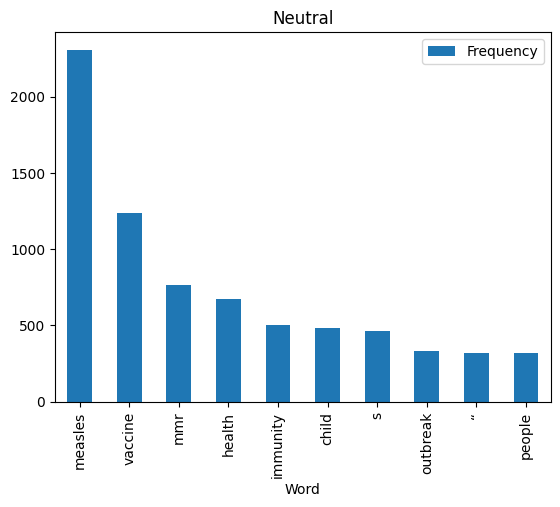

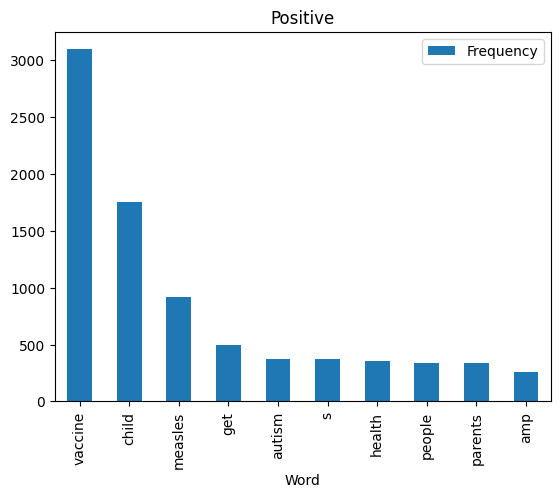

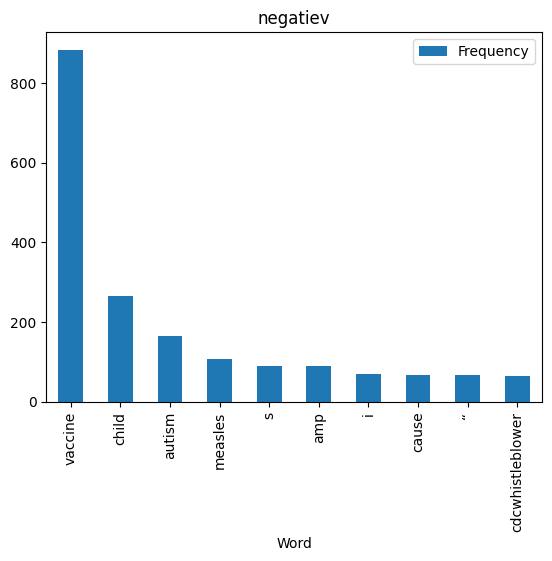

In [74]:
neutral = df[df['label']==0.0]
positive = df[df['label']==1.0]
negatiev = df[df['label']==-1.0]

word_frequency = nltk.FreqDist(neutral['safe_text'].str.split().sum())
neutral_words = word_frequency.most_common(10)
word_df = pd.DataFrame(neutral_words, columns=['Word', 'Frequency'])
word_df.plot(x='Word', y='Frequency', kind='bar')
plt.title("Neutral")
plt.show()

word_frequency = nltk.FreqDist(positive['safe_text'].str.split().sum())
neutral_words = word_frequency.most_common(10)
word_df = pd.DataFrame(neutral_words, columns=['Word', 'Frequency'])
word_df.plot(x='Word', y='Frequency', kind='bar')
plt.title("Positive")
plt.show()

word_frequency = nltk.FreqDist(negatiev['safe_text'].str.split().sum())
neutral_words = word_frequency.most_common(10)
word_df = pd.DataFrame(neutral_words, columns=['Word', 'Frequency'])
word_df.plot(x='Word', y='Frequency', kind='bar')
plt.title("negatiev")
plt.show()

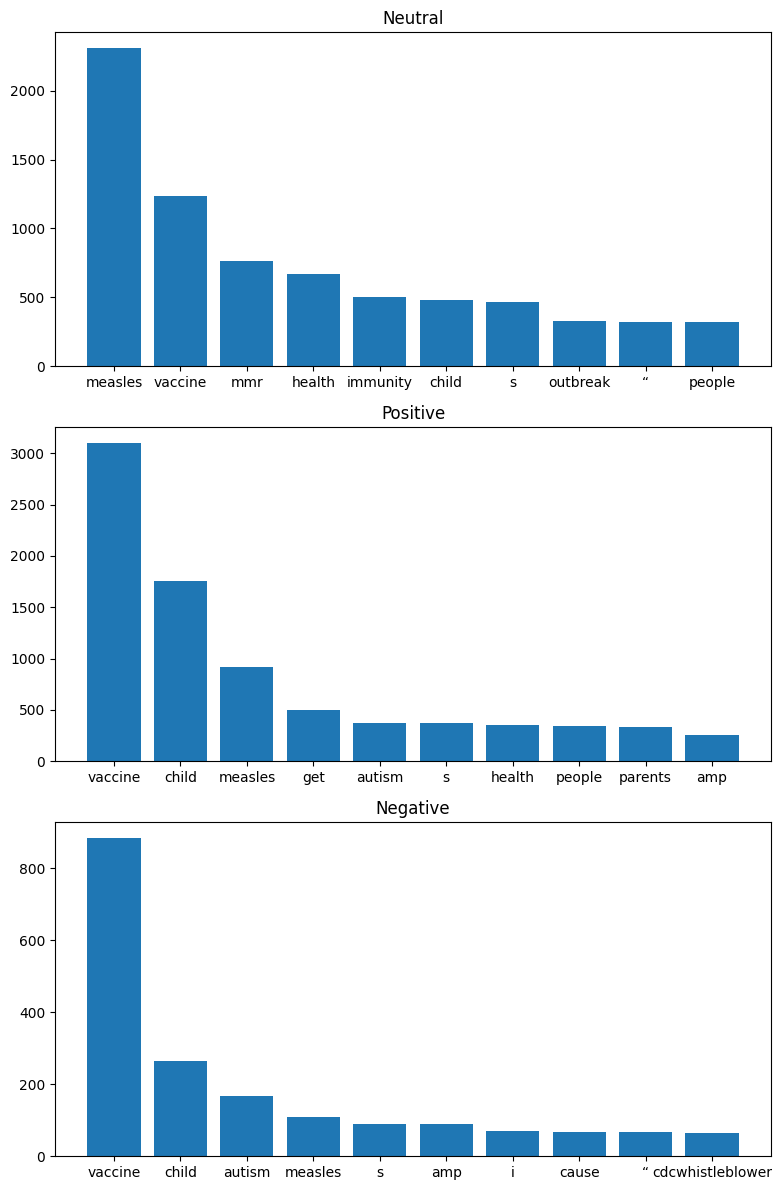

In [75]:
neutral = df[df['label'] == 0.0]
positive = df[df['label'] == 1.0]
negative = df[df['label'] == -1.0]

plt.figure(figsize=(8, 12))
# Plot for Neutral
word_frequency = nltk.FreqDist(neutral['safe_text'].str.split().sum())
neutral_words = word_frequency.most_common(10)
word_df = pd.DataFrame(neutral_words, columns=['Word', 'Frequency'])

plt.subplot(3, 1, 1)
plt.bar(word_df['Word'], word_df['Frequency'])
plt.title("Neutral")

# Plot for Positive
word_frequency = nltk.FreqDist(positive['safe_text'].str.split().sum())
positive_words = word_frequency.most_common(10)
word_df = pd.DataFrame(positive_words, columns=['Word', 'Frequency'])

plt.subplot(3, 1, 2)
plt.bar(word_df['Word'], word_df['Frequency'])
plt.title("Positive")

# Plot for Negative
word_frequency = nltk.FreqDist(negative['safe_text'].str.split().sum())
negative_words = word_frequency.most_common(10)
word_df = pd.DataFrame(negative_words, columns=['Word', 'Frequency'])

plt.subplot(3, 1, 3)
plt.bar(word_df['Word'], word_df['Frequency'])
plt.title("Negative")

plt.tight_layout()
plt.show()


**7.0 Emoji**

In [76]:
!pip install emoji

In [77]:
from collections import Counter
#import emoji


In [78]:
# define function to get emojis

def get_emojis (giant_sentence):
  giant_sentence = " ".join(giant_sentence)
  words = word_tokenize(giant_sentence)
  emojis = [e for e in words if e in emoji.UNICODE_EMOJI['en']]
  return emojis


In [79]:
pip install emoji==1.7

In [80]:
from emoji import UNICODE_EMOJI

In [81]:
import emoji

In [82]:
emojis_ = get_emojis (df['safe_text'])
Counter(emojis_).items()

dict_items([('😂', 24), ('😷', 15), ('😎', 2), ('👍', 12), ('😳', 14), ('💖', 1), ('🙅', 2), ('💙', 2), ('🏫', 1), ('😠', 4), ('😐', 5), ('💥', 1), ('😒', 20), ('▶', 2), ('😍', 4), ('💯', 3), ('😊', 3), ('😭', 5), ('🖖🏻', 2), ('😿', 1), ('💋', 1), ('👀', 1), ('💁', 4), ('😔', 1), ('💉', 16), ('😬', 4), ('😱', 6), ('👊', 2), ('🙌', 10), ('✅', 3), ('👏', 3), ('😀', 1), ('👎', 3), ('😃', 3), ('☺', 2), ('😥', 4), ('💞', 1), ('😑', 7), ('💀', 1), ('🎡', 1), ('💚', 1), ('🐅', 1), ('😡', 4), ('😫', 1), ('😁', 4), ('💃', 1), ('🙎', 1), ('😉', 1), ('👿', 1), ('😪', 4), ('😏', 4), ('😈', 1), ('🙏', 4), ('👌', 1), ('✌️', 2), ('🏆', 1), ('❤️', 3), ('😟', 1), ('😺', 1), ('🎶', 1), ('😘', 2), ('🙋', 1), ('😵', 1), ('😩', 3), ('😌', 1), ('💮', 1), ('😢', 2), ('❤', 1), ('🙈', 2), ('☺️', 2), ('👉', 1), ('🏃', 1), ('🏰', 1), ('🔥', 2), ('🏥', 2), ('🍓', 2), ('🎊', 1), ('😄', 2), ('✔', 1), ('🍉', 1), ('😧', 1), ('😞', 2), ('😝', 1), ('😜', 2), ('🌀', 2), ('🐹', 1), ('‼️', 1), ('✋', 1), ('⁉️', 1), ('😕', 1), ('🙆', 1), ('☯', 1), ('🐶', 1), ('😰', 1), ('😣', 2), ('😆', 1), ('♥', 1), ('😤',

In [83]:
emoji_count = (Counter(emojis_).items())

df_emoji = pd.DataFrame(emoji_count, columns=['emoji', 'count'])

df_emoji.head()

,emoji,count
0,😂,24
1,😷,15
2,😎,2
3,👍,12
4,😳,14


In [84]:
plt.figure(figsize=(12,6))
df_emoji.head(15).sort_values(by='count', ascending=False)

,emoji,count
0,😂,24
12,😒,20
1,😷,15
4,😳,14
3,👍,12
10,😐,5
9,😠,4
14,😍,4
2,😎,2
6,🙅,2


<Figure size 1200x600 with 0 Axes>

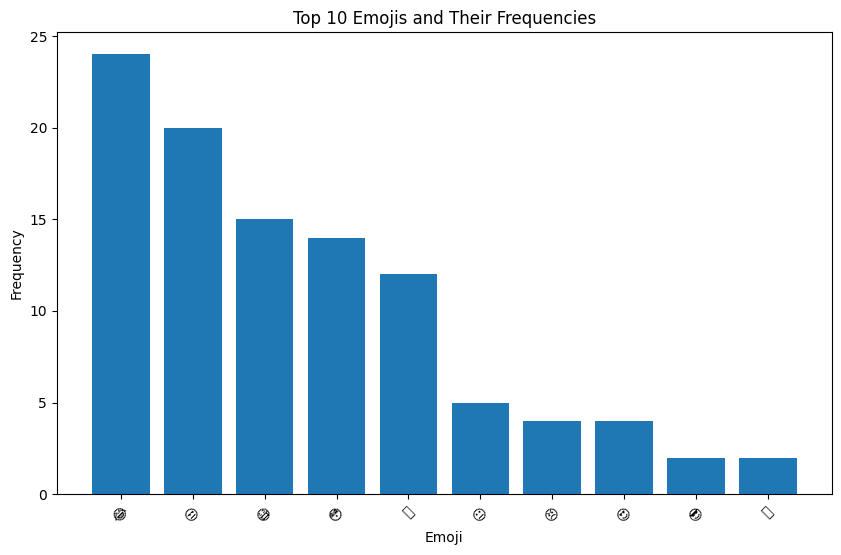

In [85]:
df_sorted = df_emoji.head(15).sort_values(by='count', ascending=False)

top_emojis = df_sorted['emoji'].head(10)
top_frequencies = df_sorted['count'].head(10)

df_sorted = df_emoji.head(15).sort_values(by='count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_emojis, top_frequencies)

# Add labels and title
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.title('Top 10 Emojis and Their Frequencies')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

#7.0 EXERCISE ON SENTIMENTAL ANALYSIS

Understanding how sentiment analysis work

In [86]:
sentiment_classifier = pipeline('sentiment-analysis')
result = sentiment_classifier('we love you')

print(result)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POSITIVE', 'score': 0.9998704195022583}]


In [87]:
print("I hate this job" , sentiment_classifier ('I hate this job'))
print("Welcome to my house" , sentiment_classifier ('Welcome to my house'))
print("At times it tends to get difficult" , sentiment_classifier ('At times it tends to get difficult'))
print("covid vaccine doesnt work well" , sentiment_classifier ('covid vaccine doesnt work well'))
print("I love and hate it" , sentiment_classifier ('I love and hate it'))
print("How accurate is this" , sentiment_classifier ('How accurate is this'))
print("The big fat cat is not lazy" , sentiment_classifier ('The big fat cat is not lazy'))

I hate this job [{'label': 'NEGATIVE', 'score': 0.9997041821479797}]
Welcome to my house [{'label': 'POSITIVE', 'score': 0.9998078942298889}]
At times it tends to get difficult [{'label': 'NEGATIVE', 'score': 0.9985059499740601}]
covid vaccine doesnt work well [{'label': 'NEGATIVE', 'score': 0.9996954202651978}]
I love and hate it [{'label': 'POSITIVE', 'score': 0.9961346387863159}]
How accurate is this [{'label': 'POSITIVE', 'score': 0.9996935129165649}]
The big fat cat is not lazy [{'label': 'POSITIVE', 'score': 0.9992713332176208}]


#8.0 MODELS SELECTION

**Here we are going to select 3 models to fine tune**

**Things to consider while selecting the models**


**1.   The the number of labels the model has**

**2.   What the model has been trained on ( Utilise transfer learning )**



MODELS SELECTED

1. [DistilRobertaModel - Model 1](https://huggingface.co/mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis), **DistilRoberta Model**

   Trained on financial news sentiment analysis , With a **LOSS OF 0.1116 , Accuracy of 0.9823**

2. [NepaliSentimentAnalysis-  Model 2](https://huggingface.co/dpkrm/NepaliSentimentAnalysis) **NepaliSentimentAnalysis Model**

   This model is a fine tuned model of the bert based model , With an accuracy of 0.9975

3. [Bert base sentiment -  Model 3](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis) **Bert base sentiment Model**

   Trained on twitter tweets.

# Preprocessing of our data

Since we are working with Text, we will use a Tokenizer to

1. convert text into a sequence of tokens

2. create a numerical representation of the tokens,

3.  assemble them into tensors.

    NB Tensors : are multi-dimensional arrays used to represent and store numerical data

    TensorFlow and PyTorch provide dedicated tensor libraries that offer efficient implementations of tensor operations, GPU acceleration, and automatic differentiation for gradient-based optimization.
    
    Tensors play a crucial role in various machine learning tasks, including deep learning, neural networks, image processing, natural language processing, and more.

The main tool for preprocessing textual data is a tokenizer. **A tokenizer splits text into tokens according to a set of rules. The tokens are converted into numbers and then tensors, which become the model inputs. Any additional inputs required by the model are added by the tokenizer.**

# Preparaion

**9.0 Splitting the data**

In [88]:
# Split the train data
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

**9.1 create a directory to save**

In [89]:
import os

# Create the 'LP5 datasets' directory to store Train and Eval
if not os.path.exists('LP5 datasets'):
    os.makedirs('LP5 datasets')

In [90]:
# Check if the directory is created

directory_path = 'LP5 datasets'

if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' was created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'LP5 datasets' already exists.


**9.2 Save datasets , and load to GPU**

In [91]:
# Save the datasets
train.to_csv("./LP5 datasets/train_subset.csv", index=False)
eval.to_csv("./LP5 datasets/eval_subset.csv", index=False)


In [92]:
# using the load_dataset function to load CSV files as datasets
dataset = load_dataset('csv',
                       data_files={'train': './LP5 datasets/train_subset.csv',
                                   'eval': './LP5 datasets/eval_subset.csv'},
                       encoding="ISO-8859-1")


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-a4c990c9ec89f2ba/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

**9.3 Check if datasets is loaded correctly**

In [93]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement'],
        num_rows: 2000
    })
})

#10.0 MODEL 1 - BERT-BASED MODEL

In [96]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')


In [97]:
# define tokenize function
def tokenize_function(df):
    return tokenizer(df['safe_text'], padding="max_length")

In [98]:
# change the tweets to tokens our model can exploit

dataset = dataset.map(tokenize_function ,  batched=True)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [99]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [100]:
# first define the transform labels function

In [101]:
def transform_labels(data):
    label = data['label']  # extracts the value of the 'label' from the data input
    num = 0
    if label == -1:  # 'Negative' sentiment
        num = 0
    elif label == 0:  # 'Neutral' sentiment
        num = 1
    elif label == 1:  # 'Positive' sentiment
        num = 2
    return {"labels": num}

In [102]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

We're interested in the tokenized data I.e **Input_ids , token_type_ids, attention_mask**

In [103]:
# Assuming you are using the 'transform_labels' function for the mapping
drop = ['tweet_id', 'safe_text', 'label', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=drop)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [104]:
# cehck if the cols are dropped
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [105]:
# set the Training arguments
training_args = TrainingArguments(
    "LP5 datasets - bert model deep learning", #FOLDER
    num_train_epochs= 2,
    evaluation_strategy="steps",
    save_strategy="steps",
    load_best_model_at_end=True
)

# we will pause the push_to_hub startegy

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [106]:
# check the training aruments selected
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=500,
evaluation_strategy=steps,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=False,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_s

In [107]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased', num_labels = 3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [108]:
# Shuffle the dataset

small_train_dataset = dataset["train"].shuffle(seed=42)
small_eval_dataset = dataset["eval"].shuffle(seed=42)

In [109]:
small_train_dataset

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 7999
})

In [110]:
small_eval_dataset

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 2000
})

In [112]:
from transformers import Trainer

In [113]:
trainer = Trainer (
    model = model,
    args = training_args,
    train_dataset = small_train_dataset,
    eval_dataset = small_eval_dataset
)

In [114]:
trainer.train()

Step,Training Loss,Validation Loss
500,0.782400,0.691856
1000,0.718900,0.656901
1500,0.616700,0.653985
2000,0.572600,0.635878


TrainOutput(global_step=2000, training_loss=0.6726415252685547, metrics={'train_runtime': 1722.8556, 'train_samples_per_second': 9.286, 'train_steps_per_second': 1.161, 'total_flos': 4209288456812544.0, 'train_loss': 0.6726415252685547, 'epoch': 2.0})

In [115]:
trainer.evaluate()

{'eval_loss': 0.6358781456947327,
 'eval_runtime': 63.8175,
 'eval_samples_per_second': 31.339,
 'eval_steps_per_second': 3.917,
 'epoch': 2.0}

#11.0 MODEL 2 - distilroberta

**ABOUT MODEL**
.
.
.
.


In [116]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_2 = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model_2 = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis" , num_labels = 3) # Specify the number of labels

In [117]:
# have the tokenize function with the Tokenizer 2

def tokenize_function_2(df):
    return tokenizer_2(df['safe_text'], padding="max_length")

In [118]:
'''
We had dropped the original columns and the columns that are remaining are tokenized from the tokenizer employed with the first model
Therefore we will have to re-read aFresh into our dataset, tokenize the text using the second tokenizer , afterwards drop the
original column such that we remain only with the input_ids token_type_ids, attention_mask snd labels,
'''
# using the load_dataset function to load CSV files as datasets
dataset_2 = load_dataset('csv',
                       data_files={'train': './LP5 datasets/train_subset.csv',
                                   'eval': './LP5 datasets/eval_subset.csv'},
                       encoding="ISO-8859-1")


  0%|          | 0/2 [00:00<?, ?it/s]

In [119]:
dataset_2

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement'],
        num_rows: 2000
    })
})

In [120]:
# Tokenize the dataset
# Changing the tweets into tokens our model can explot

dataset_2.map(tokenize_function_2, batched=True)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement', 'input_ids', 'attention_mask'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [121]:
# Look into the dataset

dataset_2 = dataset_2.map(tokenize_function_2, batched=True)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

In [122]:
def transform_labels(data):
    label = data['label']  # extracts the value of the 'label' from the data input
    num = 0
    if label == -1:  # 'Negative' sentiment
        num = 0
    elif label == 0:  # 'Neutral' sentiment
        num = 1
    elif label == 1:  # 'Positive' sentiment
        num = 2
    return {"labels": num}


In [123]:
# Assuming you are using the 'transform_labels' function for the mapping
drop = ['tweet_id', 'safe_text', 'label', 'agreement']
dataset_2 = dataset_2.map(transform_labels, remove_columns=drop)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [124]:
import tensorflow as tf

In [125]:
# Select a subset
subset_size = 1000


# Shuffle the dataset

small_train_dataset = dataset_2["train"].shuffle(seed=42)#.take(subset_size)
small_eval_dataset = dataset_2["eval"].shuffle(seed=42) #.take(subset_size)

In [126]:
small_train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 7999
})

In [127]:
small_eval_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2000
})

In [128]:
# set the Training arguments
training_args = TrainingArguments(
    "LP5 datasets - Model 2",
    num_train_epochs= 5 ,
    evaluation_strategy="steps",
    save_strategy="steps",
    load_best_model_at_end=True
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [129]:
# Create a trainer

trainer_2 = Trainer (
    model = model_2,
    args = training_args,
    train_dataset = small_train_dataset,
    eval_dataset = small_eval_dataset
)

In [130]:
trainer_2.train()

Step,Training Loss,Validation Loss
500,0.811700,0.691740
1000,0.721300,0.727822
1500,0.658600,0.684072
2000,0.630700,0.617329
2500,0.531700,0.677182
3000,0.525800,0.656070
3500,0.432600,0.859541
4000,0.415200,0.776144
4500,0.330900,1.058625
5000,0.330300,1.068476


TrainOutput(global_step=5000, training_loss=0.5388885375976562, metrics={'train_runtime': 2204.2088, 'train_samples_per_second': 18.145, 'train_steps_per_second': 2.268, 'total_flos': 5298128092154880.0, 'train_loss': 0.5388885375976562, 'epoch': 5.0})

In [131]:
trainer_2.evaluate()

{'eval_loss': 0.6173285841941833,
 'eval_runtime': 29.4774,
 'eval_samples_per_second': 67.849,
 'eval_steps_per_second': 8.481,
 'epoch': 5.0}

#### PARAMETERS TO KNOW

1.   **Padding**
    Padding is a strategy for ensuring tensors are rectangular by adding a special padding token to shorter sentences.

    e.g a zero can be added

    encoded_input = tokenizer(batch_sentences, **padding=True**)


2.   **Truncation**
    a sequence may be too long for a model to handle.
    In this case, you’ll need to truncate the sequence to a shorter length.

    encoded_input = tokenizer(batch_sentences, padding=True, **truncation=True**)  


3.   **Build tensors**
    Finally, you want the tokenizer to return the actual tensors that get fed to the model.

    Set the return_tensors parameter to either pt for PyTorch, or tf for TensorFlow:

    encoded_input = tokenizer(batch_sentences, padding=True, truncation=True, **return_tensors="pt"**)


